In [7]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'Business Analyst -ABC University (1).xlsx'
df = pd.read_excel(file_path, sheet_name='Adamas University npf dump')
df.head()


,Name,Mobile,Lead Origin,Country,State,City,Instance,Instance Date,Campaign,Lead Stage,...,Mobile Verification Status,Registration Device,Course,Specialization,Campus,Last Lead Activity Date,Form Initiated,Paid Applications,Submitted Applications,Enrolment Status
0,Ram Yadav,9830******,API,India,West Bengal,Kolkata,Primary,2023-10-09,Meta/85/API,Untouched,...,No,NaN,B.Tech in Biomedical Engineering,Specialization Not Available,UG,2023-10-09 11:26:00,0,0,0,No
1,Anamika Bairagi,7439******,API,India,West Bengal,Barasat,Primary,2023-10-09,Meta/84/API,Disqualified,...,No,NaN,"BCA (Hons) in Banking, Financial Services and ...",Specialization Not Available,UG,2023-10-09 11:20:00,0,0,0,No
2,Puja Singh,7003******,API,India,West Bengal,Kolkata,Primary,2023-10-09,Meta/85/API,No Response,...,No,NaN,"MBA (Human Resource, Marketing, Finance)",Specialization Not Available,PG,2023-10-09 10:17:00,0,0,0,No
3,Jhuma Haldar,9831******,API,India,West Bengal,Kolkata,Primary,2023-10-09,Meta/88/API,Disqualified,...,No,NaN,M.A in Public Policy,Specialization Not Available,PG,2023-10-09 10:16:00,0,0,0,No
4,Rajan Kumar,9128******,API,India,West Bengal,Kolkata,Primary,2023-10-09,Meta/85/API,Disqualified,...,No,NaN,B.Com (H),Specialization Not Available,UG,2023-10-09 08:14:00,0,0,0,No


In [2]:
lead_stage_distribution = df['Lead Stage'].value_counts()
lead_stage_distribution


Lead Stage
Disqualified          17446
NR Closed              5936
No Response            4139
Qualified              2884
Asked for Callback     1029
Untouched                99
PhD Enquiry              56
Sports Quota             15
Name: count, dtype: int64

Geographical Distribution by State:

In [3]:
state_distribution = df['State'].value_counts()
state_distribution


State
West Bengal            29844
Bihar                    450
Jharkhand                351
Assam                    220
Odisha                    90
Delhi                     84
Tripura                   77
Maharashtra               75
Uttar Pradesh             70
Karnataka                 38
Tamil Nadu                26
Madhya Pradesh            25
Nagaland                  24
Meghalaya                 22
Andhra Pradesh            21
Gujarat                   20
Arunachal Pradesh         20
Kerala                    17
Chhattisgarh              17
Rajasthan                 16
Telangana                 16
Manipur                   14
Haryana                   13
Sikkim                    12
Mizoram                   10
Uttarakhand                9
Andaman and Nicobar        7
State Not Available        7
Jammu and Kashmir          3
Himachal Pradesh           3
Puducherry                 1
Chandigarh                 1
Daman And Diu              1
Name: count, dtype: int64

Course Preferences:

In [4]:
course_distribution = df['Course'].value_counts()
course_distribution.head(10)


Course
B.Com (H)                                                                                                                2697
B.Ed                                                                                                                     2355
BA LLB (Hons.)                                                                                                           1316
B.Pharm                                                                                                                   988
BBA in Logistics and Supply Chain Management                                                                              898
BCA                                                                                                                       896
BCA (Hons) in Banking, Financial Services and Insurance                                                                   800
BBA (Human Resource, Marketing, Finance, Business Analytics, Digital Marketing, Entrepreneurship and Family Bus

Enrolment Status:

In [5]:
enrolment_status_distribution = df['Enrolment Status'].value_counts()
enrolment_status_distribution


Enrolment Status
No     31469
Yes      135
Name: count, dtype: int64

Lead Stage Distribution - Bar Chart:

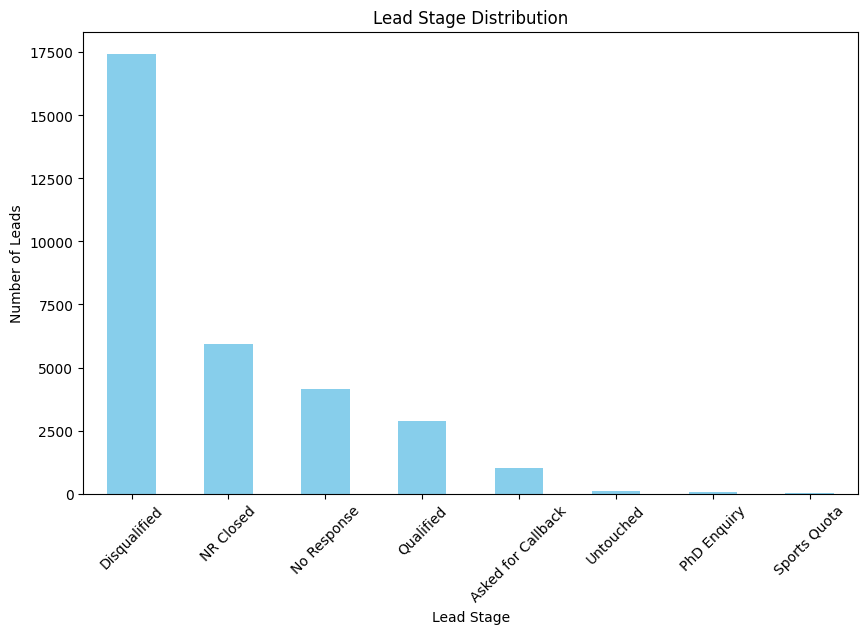

In [8]:
lead_stage_distribution = df['Lead Stage'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
lead_stage_distribution.plot(kind='bar', color='skyblue')
plt.title('Lead Stage Distribution')
plt.xlabel('Lead Stage')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45)
plt.show()


Geographical Distribution - Pie Chart:

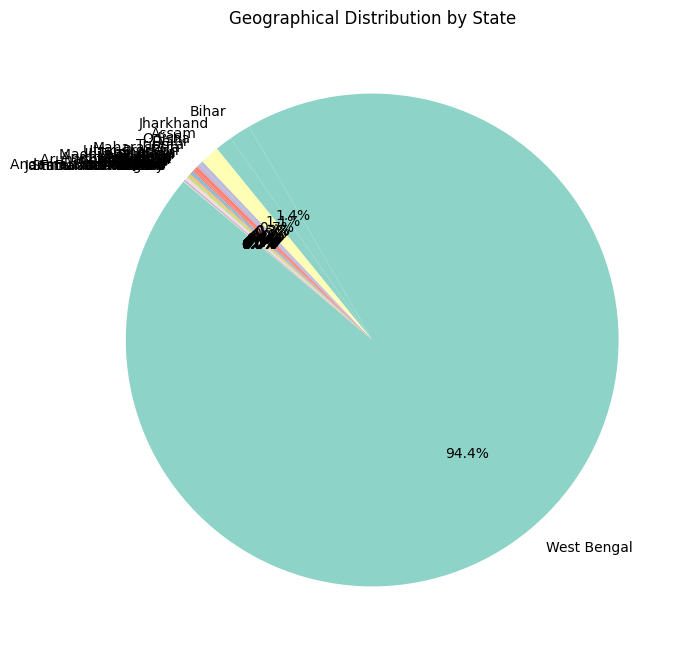

In [11]:
state_distribution = df['State'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
state_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Set3')
plt.title('Geographical Distribution by State')
plt.ylabel('')  # Hide the y-label
plt.show()


Course Preferences - Horizontal Bar Chart:

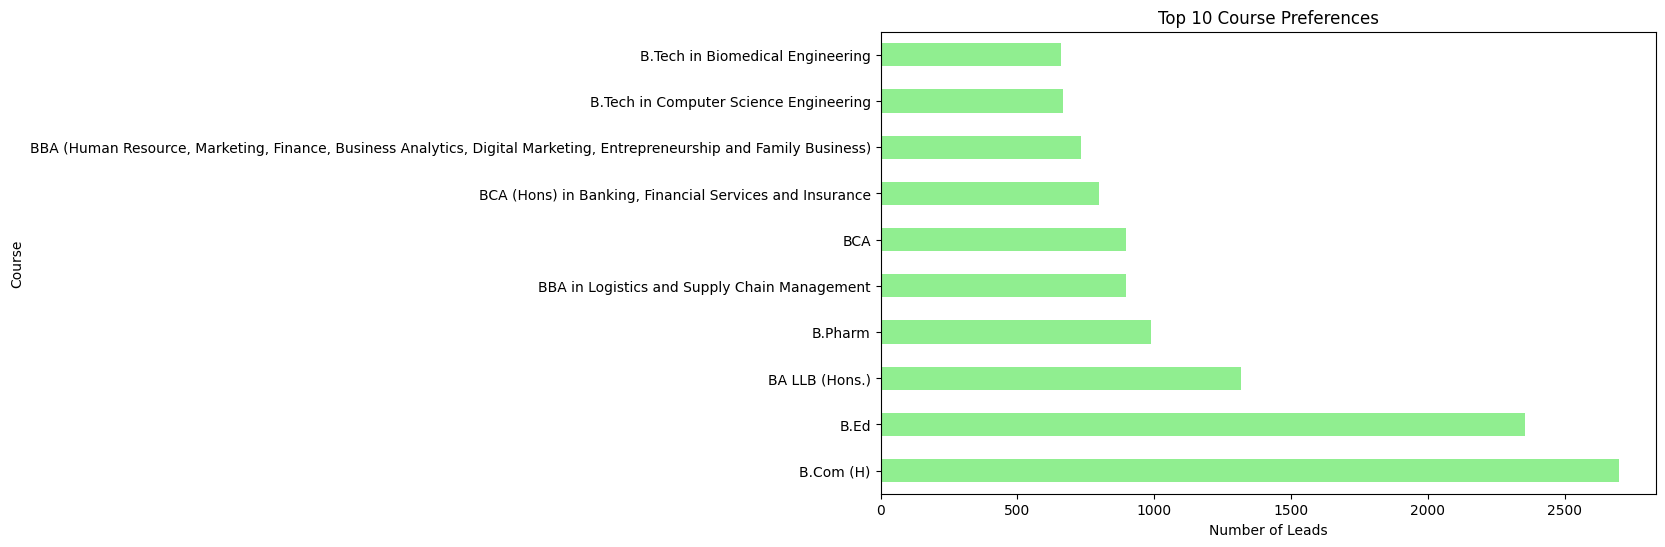

In [12]:
course_distribution = df['Course'].value_counts().head(10)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
course_distribution.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Course Preferences')
plt.xlabel('Number of Leads')
plt.ylabel('Course')
plt.show()


Enrolment Status - Count Plot:

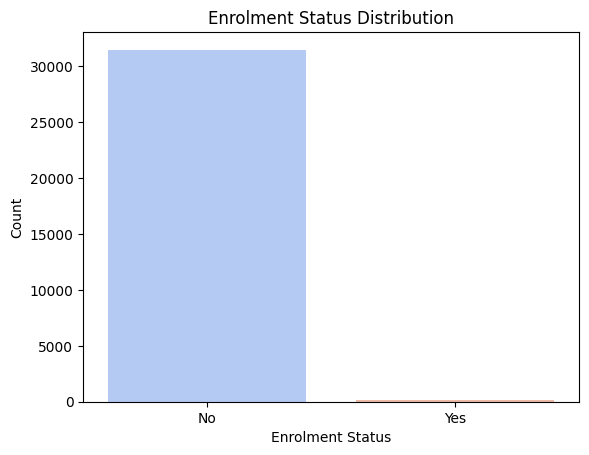

In [16]:
sns.countplot(x='Enrolment Status', data=df, hue='Enrolment Status', palette='coolwarm', dodge=False)
plt.title('Enrolment Status Distribution')
plt.xlabel('Enrolment Status')
plt.ylabel('Count')
#plt.legend().set_visible(False) 
plt.show()


Analysis of Leads by Campaign:

In [17]:
campaign_distribution = df['Campaign'].value_counts()

# Display the top campaigns
campaign_distribution.head(10)


Campaign
Meta/88/API        18898
Meta/85/API         3573
Meta/90_RV/API      1831
Meta/89/API         1375
Meta/86/API          888
Meta/84/API          763
Meta/90/API          556
Meta/4/API           474
Meta/88_MPA/API      457
Meta/SMS/Online      350
Name: count, dtype: int64

Visualizing Campaign Distribution:

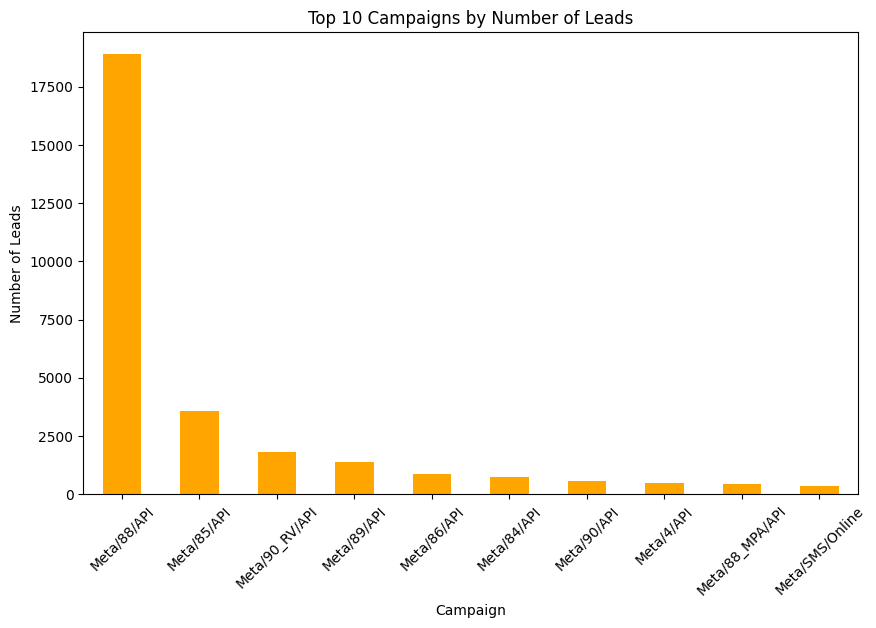

In [18]:
plt.figure(figsize=(10, 6))
campaign_distribution.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Campaigns by Number of Leads')
plt.xlabel('Campaign')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45)
plt.show()


Trend Analysis Over Time:

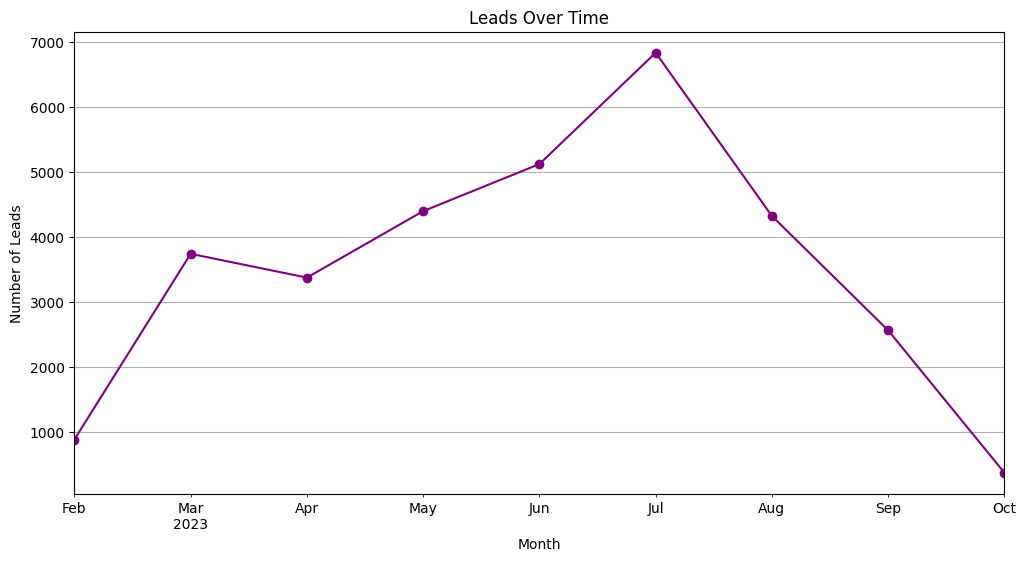

In [19]:
df['Instance Date'] = pd.to_datetime(df['Instance Date'])
leads_over_time = df.groupby(df['Instance Date'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
leads_over_time.plot(kind='line', marker='o', color='purple')
plt.title('Leads Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Leads')
plt.grid(True)
plt.show()


Heatmap of Lead Origin vs Lead Stage:

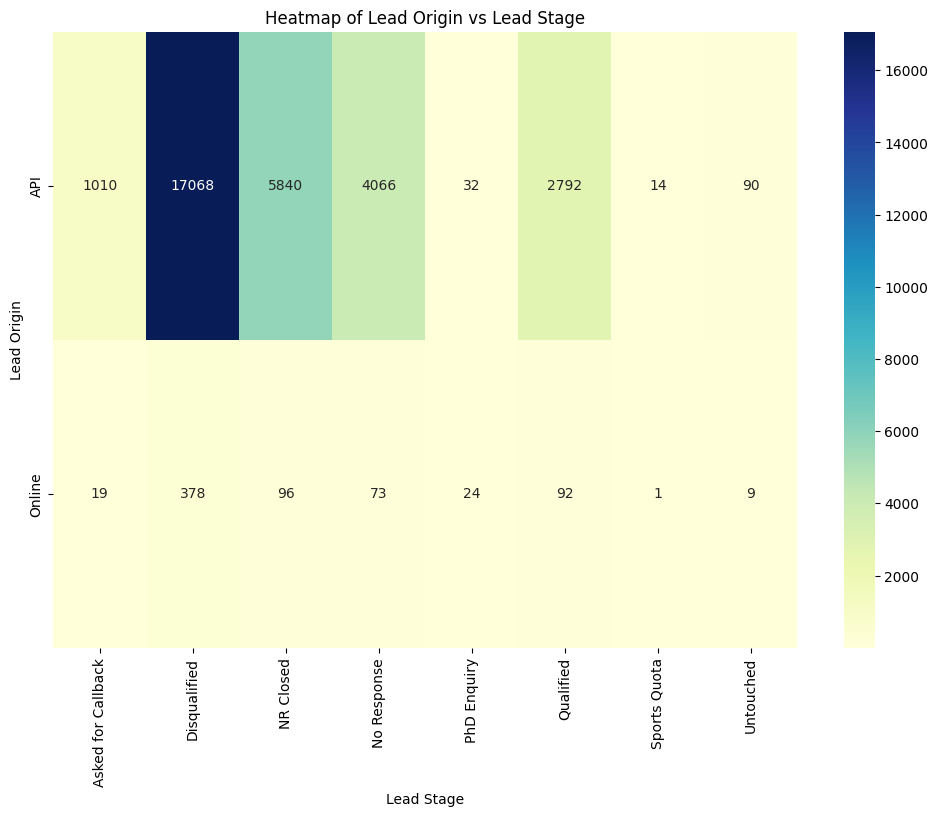

In [20]:
origin_stage_pivot = df.pivot_table(index='Lead Origin', columns='Lead Stage', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(origin_stage_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Lead Origin vs Lead Stage')
plt.xlabel('Lead Stage')
plt.ylabel('Lead Origin')
plt.show()
